In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline


df=pd.read_csv(r"C:\Users\HP\.jupyter\house_prices.csv")
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [20]:
df['intercept']=1
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept
0,1112,B,1188,3,2,ranch,598291,1
1,491,B,3512,5,3,victorian,1744259,1
2,5952,B,1134,3,2,ranch,571669,1
3,3525,A,1940,4,2,ranch,493675,1
4,5108,B,2208,6,4,victorian,1101539,1


In [21]:
lm=sm.OLS(df['price'],df[['intercept','area','bedrooms','bathrooms']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:20:58   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. Use the pd.get_dummies documentation to assist you with obtaining dummy variables for the neighborhood column. Then use join to add the dummy variables to your dataframe, df, and store the joined results in df_new.

Fit a linear model using all three levels of neighborhood to predict the price. Don't forget an intercept.

Use your results to answer quiz 1 below.

In [22]:
neighborhood_dummies=pd.get_dummies(df['neighborhood'])
df_new=df.join(neighborhood_dummies)
df_new.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C
0,1112,B,1188,3,2,ranch,598291,1,0,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,1,0
2,5952,B,1134,3,2,ranch,571669,1,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,1,0,0
4,5108,B,2208,6,4,victorian,1101539,1,0,1,0


In [23]:
lm=sm.OLS(df_new['price'],df_new[['intercept','A','B','C']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:20:58   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.381e+05   4439.653    121.210      0.000    5.29e+05    5.47e+05
A           3001.8311   8650.726      0.347      0.729    -1.4e+04       2e+04
B           5.325e+05   7894.313     67.448      0.000    5.17e+05    5.48e+05
C           2669.4717   8925.271      0.299      0.765   -1.48e+04    2.02e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                     1.32e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.67e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

2. Now, fit an appropriate linear model for using neighborhood to predict the price of a home. Use neighborhood A as your baseline. (And remember that the values shown in the results for the other neighborhoods will be based on comparisons with this baseline neighborhood A then.) Use your resulting model to answer the questions in Quiz 2 and Quiz 3 below.

In [24]:
lm2=sm.OLS(df_new['price'],df_new[['intercept','B','C']])
result=lm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:20:58   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.411e+05   1.05e+04     51.537      0.000    5.21e+05    5.62e+05
B           5.295e+05    1.4e+04     37.870      0.000    5.02e+05    5.57e+05
C           -332.3594   1.52e+04     -0.022      0.983   -3.01e+04    2.94e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                         3.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. Run the two cells below to look at the home prices for the A and C neighborhoods. Add neighborhood B. This creates a glimpse into the differences that you found in the previous linear model.

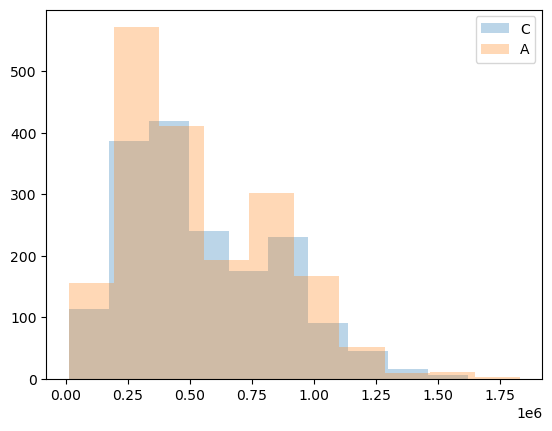

In [25]:
plt.hist(df_new.query("C == 1")['price'], alpha = 0.3, label = 'C');
plt.hist(df_new.query("A == 1")['price'], alpha = 0.3, label = 'A');

plt.legend();

4. Now, add dummy variables for the style of house. Create a new linear model using these new dummies, as well as the previous neighborhood dummies. Use ranch as the baseline for the style. Additionally, add bathrooms and bedrooms to your linear model. Don't forget an intercept. Use the results of your linear model to answer the last two questions below. Home prices are measured in dollars, and this dataset is not real.

To minimize scrolling, it might be useful to open another browser window to this concept to answer the quiz questions.

In [26]:
type_dummies=pd.get_dummies(df['style'])
df_new1=df_new.join(type_dummies)
df_new1.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,1,0,1,0,0,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,1,0,0,0,1
2,5952,B,1134,3,2,ranch,571669,1,0,1,0,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,1,0,0,0,1,0
4,5108,B,2208,6,4,victorian,1101539,1,0,1,0,0,0,1


In [27]:
lm3=sm.OLS(df_new1['price'],df_new1[['intercept','B','C','ranch','victorian']])
result=lm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2113.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:20:58   Log-Likelihood:                -85290.
No. Observations:                6028   AIC:                         1.706e+05
Df Residuals:                    6023   BIC:                         1.706e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.941e+04   1.15e+04      8.607      0.000    7.68e+04    1.22e+05
B           5.247e+05   1.04e+04     50.507      0.000    5.04e+05    5.45e+05
C          -6685.7296   1.13e+04     -0.593      0.553   -2.88e+04    1.54e+04
ranch       2.639e+05   1.25e+04     21.110      0.000    2.39e+05    2.88e+05
victorian   7.373e+05   1.14e+04     64.413      0.000    7.15e+05     7.6e+05
==============================================================================
Omnibus:                      930.122   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2984.126
Skew:                           0.787   Prob(JB):                         0.00
Kurtosis:                       6.067   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
lm3=sm.OLS(df_new1['price'],df_new1[['intercept','B','C','ranch','victorian','bedrooms','bathrooms']])
result=lm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4250.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:20:59   Log-Likelihood:                -82944.
No. Observations:                6028   AIC:                         1.659e+05
Df Residuals:                    6021   BIC:                         1.659e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.148e+05   9563.445    -22.456      0.000   -2.34e+05   -1.96e+05
B           5.229e+05   7040.928     74.271      0.000    5.09e+05    5.37e+05
C          -7168.6285   7639.254     -0.938      0.348   -2.21e+04    7807.045
ranch      -1.685e+05   9906.629    -17.012      0.000   -1.88e+05   -1.49e+05
victorian  -9.797e+04   1.26e+04     -7.780      0.000   -1.23e+05   -7.33e+04
bedrooms    1.732e+05   7677.152     22.558      0.000    1.58e+05    1.88e+05
bathrooms   9.996e+04   1.09e+04      9.164      0.000    7.86e+04    1.21e+05
==============================================================================
Omnibus:                      978.611   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2926.472
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                       5.962   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multicollinearity & VIFs

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

df = pd.read_csv(r"C:\Users\HP\.jupyter\house_prices.csv")
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


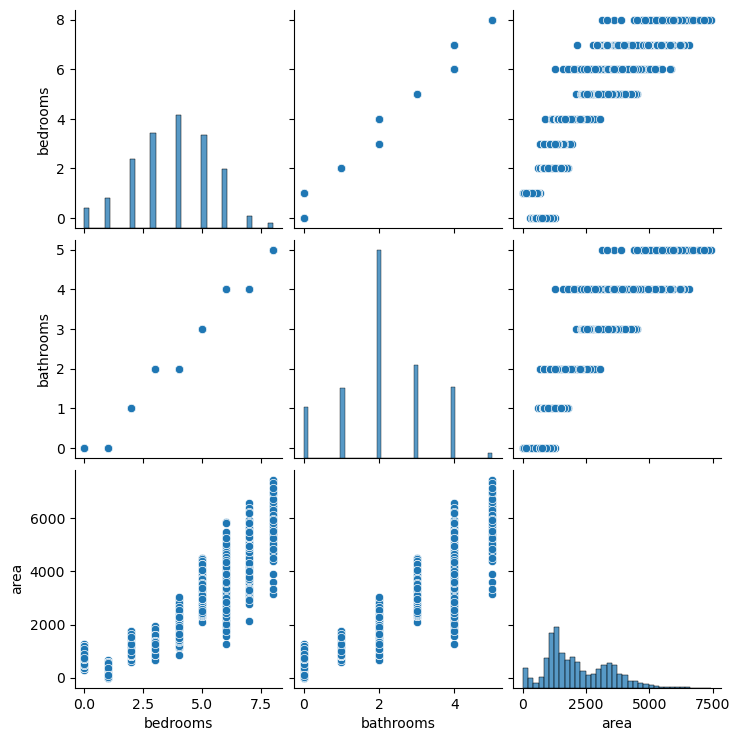

In [30]:
sns.pairplot(df[['bedrooms','bathrooms','area']])

In [31]:
df['intercept'] = 1
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms', 'bathrooms', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:21:02   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
y,X=dmatrices('price~area+bedrooms+bathrooms',df,return_type='dataframe')
VIF=pd.DataFrame()
VIF['VIF factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF['features']=X.columns
VIF

,VIF factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


In [33]:
df['intercept'] = 1
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms','area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:21:02   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
y,X=dmatrices('price~area+bedrooms',df,return_type='dataframe')
VIF=pd.DataFrame()
VIF['VIF factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF['features']=X.columns
VIF

,VIF factor,features
0,6.063895,Intercept
1,5.345400,area
2,5.345400,bedrooms


In [36]:
#--------------------------------------------------------------------

In [43]:
lm3=sm.OLS(df_new1['price'],df_new1[['intercept','B','C','ranch','victorian','lodge','area']])
result=lm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:40:57   Log-Likelihood:                -80348.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6022   BIC:                         1.607e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.509e+05   3994.711    -37.784      0.000   -1.59e+05   -1.43e+05
B           5.245e+05   4575.989    114.611      0.000    5.15e+05    5.33e+05
C            194.2464   4965.459      0.039      0.969   -9539.832    9928.324
ranch      -4.954e+04   3058.708    -16.197      0.000   -5.55e+04   -4.35e+04
victorian  -5.383e+04   4401.311    -12.230      0.000   -6.25e+04   -4.52e+04
lodge      -4.757e+04   3616.981    -13.151      0.000   -5.47e+04   -4.05e+04
area         348.7375      2.205    158.177      0.000     344.415     353.060
==============================================================================
Omnibus:                      114.369   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.082
Skew:                           0.271   Prob(JB):                     6.29e-31
Kurtosis:                       3.509   Cond. No.                     1.12e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.91e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
df_new1['area_squared']=df_new1['area']*df_new1['area']
lm4=sm.OLS(df_new1['price'],df_new1[['intercept','ranch','lodge']])
result=lm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1548.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:52:40   Log-Likelihood:                -86683.
No. Observations:                6028   AIC:                         1.734e+05
Df Residuals:                    6025   BIC:                         1.734e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.046e+06   7775.607    134.534      0.000    1.03e+06    1.06e+06
ranch       -4.71e+05   1.27e+04    -37.115      0.000   -4.96e+05   -4.46e+05
lodge      -7.411e+05   1.44e+04    -51.396      0.000   -7.69e+05   -7.13e+05
==============================================================================
Omnibus:                     1340.120   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3232.810
Skew:                           1.230   Prob(JB):                         0.00
Kurtosis:                       5.611   Cond. No.                         3.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
df_new1['area_squared']=df_new1['area']*df_new1['area']
lm4=sm.OLS(df_new1['price'],df_new1[['intercept','ranch','victorian','area','area_squared']])
result=lm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     3173.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:57:27   Log-Likelihood:                -84516.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6023   BIC:                         1.691e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     1.855e+04   1.26e+04      1.467      0.142   -6229.316    4.33e+04
ranch         9917.2547   1.27e+04      0.781      0.435    -1.5e+04    3.48e+04
victorian     2509.3956   1.53e+04      0.164      0.870   -2.75e+04    3.25e+04
area           334.0146     13.525     24.696      0.000     307.501     360.528
area_squared     0.0029      0.002      1.283      0.199      -0.002       0.007
==============================================================================
Omnibus:                      375.220   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.688
Skew:                           0.519   Prob(JB):                     1.05e-74
Kurtosis:                       2.471   Cond. No.                     4.33e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""